In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (5,3)

/var/folders/5h/w_ddszcj1b9581y293ys2dw40000gn/T/ipykernel_23169/1855272890.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [10]:
# データの作成
data = {
    'x': [3.000000, 3.210526, 3.421053, 3.631579, 3.842105, 4.052632, 4.263158, 4.473684, 4.684211, 4.894737, 
          5.105263, 5.315789, 5.526316, 5.736842, 5.947368, 6.157895, 6.368421, 6.578947, 6.789474, 7.000000],
    'y': [5, 3, 6, 7, 7, 5, 9, 9, 7, 10, 12, 8, 7, 4, 4, 11, 9, 9, 8, 6]
}

# データフレームに変換
d = pd.DataFrame(data)
d.head()

,x,y
0,3.000000,5
1,3.210526,3
2,3.421053,6
3,3.631579,7
4,3.842105,7


In [11]:
model = smf.glm('y ~ x', data=d, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.018
Date:                Sat, 08 Jun 2024   Deviance:                       14.171
Time:                        17:01:56   Pearson chi2:                     13.6
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07179
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5661      0.360      4.351      0.0

In [12]:
!pip install pymc
import pymc as pm
import arviz as az

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [beta1, beta2]


Output()

Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta1,1.552,0.356,0.857,2.196,0.005,0.003,5468.0,5771.0,1.0
beta2,0.085,0.068,-0.042,0.213,0.001,0.001,5514.0,5758.0,1.0


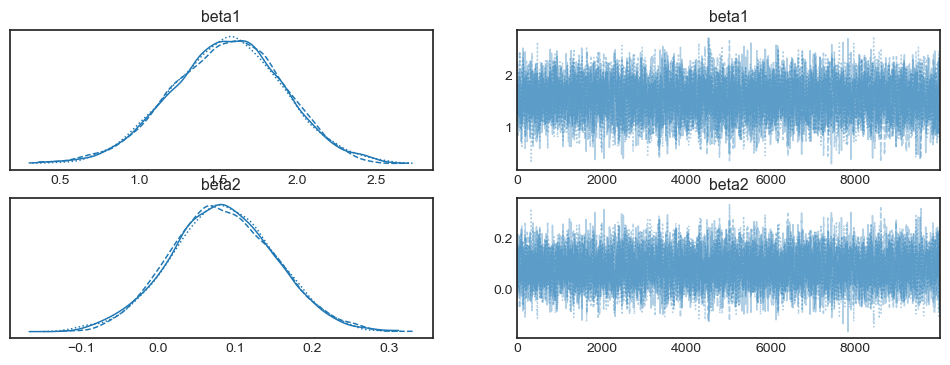

In [23]:
with pm.Model() as model:
    beta1 = pm.Normal('beta1', mu=0, sigma=100)
    beta2 = pm.Normal('beta2', mu=0, sigma=100)
    theta = beta1+beta2*d['x'].values
    mu = pm.math.exp(theta)
    y_obs = pm.Poisson('y_obs', mu=mu, observed=d['y'].values)
    trace = pm.sample(10000, tune=1000, chains=3, random_seed=0)
    
az.plot_trace(trace)
az.summary(trace)